# 12.2. Simulating an elementary cellular automaton

In [1]:
import numpy as np
import matplotlib
import random
import matplotlib.pyplot as plt
%matplotlib inline

#source https://github.com/ipython-books/cookbook-2nd-code

# Print some velocity averages

In [2]:
# N = 1000
# L = 1000
# its = 1000
# eta_range = [2.0, 0.2, 0.02, 0.002, 0.0002]

# for eta in eta_range:
#     p = (N/L)
#     x = generate2(L, its, eta, p)
#     avg_velocity = []

#     for gen in x:
#         velocities = []
#         for vel in gen:  # only count the non-zero velocities
#             if vel != 0:
#                 velocities.append(vel)
#         avg_velocity.append(sum(velocities)/len(velocities))
#     plt.plot(avg_velocity, label=eta)

# plt.legend()
# plt.show()

## Particle density plot

In [3]:
def U(x_row, pos):
    neighbours = []
     
    # two nearest neighbours total 
    if pos == 0:
        neighbours_pos = [1, -1, pos]
    elif pos == len(x_row)-1:
        neighbours_pos = [0, -2, pos]
    else:
        neighbours_pos = [pos-1, pos, pos+1]  
    
    maj_velocity = 0
    for n in neighbours_pos:
        pos_list = x_row[n]
        for idx in range(len(pos_list)):
            maj_velocity += x_row[n][idx] # getting the velocity of every bird that is locates at this position
    
    if maj_velocity > 0:
        velocity_avg = +1
    elif maj_velocity < 0:
        velocity_avg = -1
    else:
        velocity_avg = 0
    
    return velocity_avg

def flock_step(x_row, eta, size):
    new_row = [ [] for _ in range(size) ]
    W_list = []
    for pos, birds in enumerate(x_row):
        for bird in (birds):
            #chosen particle
            x_mu = pos  # location of bird
            v_mu = bird   # velocity of bird

            U_x = U(x_row, pos)

            W_u = (1-(1-2*eta)*v_mu*U_x)/2
            W_list.append(W_u)
            if v_mu == 0:
                continue

            if (random.random() < W_u):
                # We flip direction of bird
                if v_mu == -1:
                    vel_to_insert = 1
                    pos_to_insert = x_mu + vel_to_insert

                    # make sure we keep bounds in mind, insert in the beginning
                    if pos_to_insert > (len(x_row)-1):
                        pos_to_insert = 0
                else: # v_mu is 1
                    vel_to_insert = -1
                    pos_to_insert = x_mu + vel_to_insert
                
                new_row[pos_to_insert].append(vel_to_insert)
                
            else:
                # We do not flip, keep original velocity. But we do move the bird
                vel_to_insert = v_mu
                if (pos == (len(x_row)-1)) & (v_mu == 1): # move from right bound to left bound
                    pos_to_insert = 0
                else:
                    pos_to_insert = x_mu + v_mu
                
                new_row[pos_to_insert].append(vel_to_insert)
    
    #print('new row', new_row.shape)
    return new_row, np.mean(W_list)


def generate2(size, steps, eta, p):
    #x = np.empty((steps, size), dtype=object)
    x = [ [ [] for _ in range(size) ] for _ in range(steps) ]
    
    velocities  = np.random.choice([-1, 0, 1], size=size, p=[p/2, 1-p, p/2])
    velocities = velocities.tolist()

    for idx, v in enumerate(velocities):
        x[0][idx] = [v]
    
    W_list = []
    for i in range(steps - 1):
        x[i + 1], w_average = flock_step(x[i], eta, size)
        W_list.append(w_average)
# W_LIST NEEDs to be list
    return x, W_list

[0.2909, 0.30401999999999996, 0.28188, 0.2503099999999999, 0.22857999999999992, 0.19946999999999993, 0.1986499999999999, 0.18675999999999993, 0.20397999999999994, 0.18347999999999992, 0.19044999999999992, 0.19085999999999995, 0.17568999999999993, 0.18183999999999992, 0.17035999999999993, 0.1740499999999999, 0.16297999999999993, 0.17650999999999994, 0.18224999999999994, 0.16871999999999993, 0.19782999999999992, 0.18962999999999994, 0.17363999999999993, 0.17609999999999995, 0.18675999999999993, 0.17322999999999994, 0.1822499999999999, 0.19167999999999993, 0.17445999999999992, 0.1789699999999999, 0.18839999999999993, 0.18880999999999995, 0.17773999999999993, 0.1715899999999999, 0.16174999999999995, 0.18183999999999992, 0.17363999999999993, 0.17691999999999994, 0.16871999999999995, 0.16543999999999992, 0.1740499999999999, 0.18183999999999992, 0.17732999999999993, 0.1666699999999999, 0.14985999999999994, 0.16338999999999992, 0.17035999999999993, 0.15764999999999993, 0.17240999999999995, 0.1

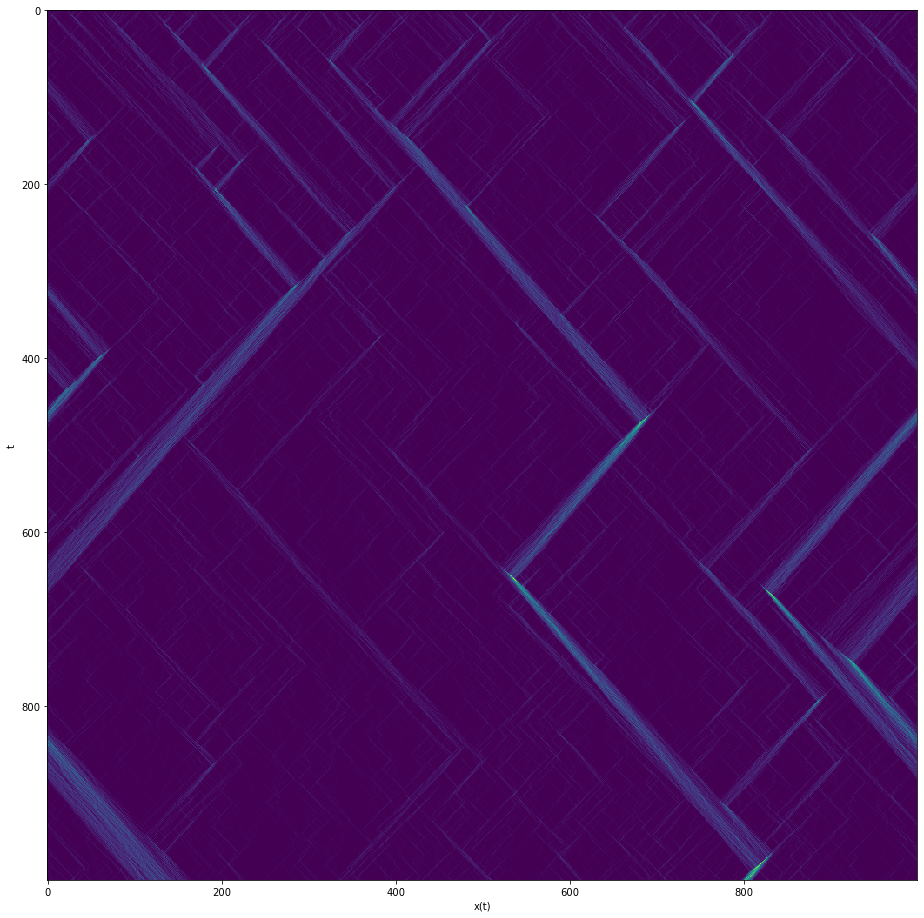

In [4]:
N = 1000
L = 1000
its = 1000
eta = 0.13
p = (N/L)
x, W_list = generate2(L, its, eta, p)
print(W_list)

def get_density_values(x):
    list_of_density = []
    for gens in x:
        density_row = []
        for pos in gens:
            density_row.append(len(pos))
        list_of_density.append(density_row)
    return list_of_density


density_x = get_density_values(x)
#print(W_list)
plt.figure(figsize=(20, 16))
plt.ylabel('t')
plt.xlabel('x(t)')
plt.imshow(density_x, interpolation='none')

[]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Text(0.5, 0, 'Lattice Size (L)')

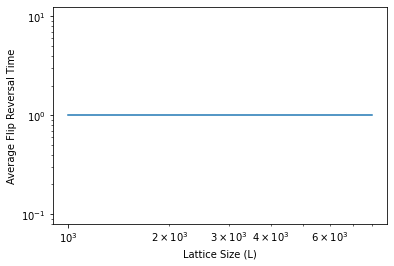

In [39]:
# plot for time reversal with different L sizes

L = 1000 # vary
N = L # density is constant with this
its = 1000
eta = 1.0 # fixed 0.02
sizes = [1000,2000,4000,8000]#,4000,7000,10000] #linspace or logspace
i = 0
timelist = []
for L in sizes:
    prev_counter = 0
    counter = 0
    p = (N/L)
    x,W_list = generate2(L, its, eta, p)
    avg_velocity = []
    # is initialising this correct?
    prev_mean_particle_velocity = 0
    #endcap = np.arange(round(N*.9), N)
    #endcap = list(endcap)
    print(timelist)
    templist = []
    for gen in x:
        velocities = []
        #print(gen)
        for vel in gen:  # only count the non-zero velocities
            if vel == []:
                continue
            if vel != 0:
                for v in vel:
                    velocities.append(int(v))
        mean_particle_velocity = np.mean(velocities)
        if mean_particle_velocity * prev_mean_particle_velocity < 0:
            #print('flip from',prev_mean_particle_velocity,'to', mean_particle_velocity,'after',counter-prev_counter, 'iterations')
            templist.append(counter-prev_counter)
            prev_counter = counter
        prev_mean_particle_velocity = mean_particle_velocity
        counter += 1
    timelist.append(templist)
    i += 1
print(timelist)
Y = []
X = []
for l in range(0,len(timelist)):
    Y.append(int(np.mean(timelist[l])))
    X.append(sizes[l])
print(X,Y)
plt.plot(X,Y)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Average Flip Reversal Time')
plt.xlabel('Lattice Size (L)')
# avg_velocity.append((abs(sum(velocities)))/len(velocities))
# u = np.unique(avg_velocity[-10:])
# eta = eta*np.ones(len(u))
# plt.plot(eta, u, '.')
# end_average_velocity.append(np.mean(avg_velocity[-100:]))
# rounds += 1

[0.3, 0.5, 0.7, 0.9, 1.1] [3, 2, 1, 1, 1]


Text(0.5, 0, 'Eta')

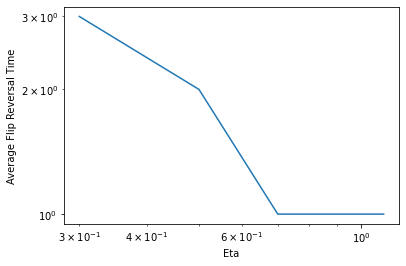

In [38]:
# plot for time reversal with different eta values

L = 1000 # increase L for more consistent plots
N = L # density is constant with this
its = 1000
eta = 0.012
sizes = [1000,1500,2000,3000,5000]#,4000,7000,10000] #linspace or logspace
eta_range = [0.3, 0.5,0.7, 0.9, 1.1]
timelist = []
for eta in eta_range:
    prev_counter = 0
    counter = 0
    p = (N/L)
    x,W_list = generate2(L, its, eta, p)
    avg_velocity = []
    # is initialising this correct?
    prev_mean_particle_velocity = 0
    #endcap = np.arange(round(N*.9), N)
    #endcap = list(endcap)
    #print(timelist)
    templist = []
    for gen in x:
        velocities = []
        #print(gen)
        for vel in gen:  # only count the non-zero velocities
            if vel == []:
                continue
            if vel != 0:
                for v in vel:
                    velocities.append(int(v))
        mean_particle_velocity = np.mean(velocities)
        if mean_particle_velocity * prev_mean_particle_velocity < 0:
            # print('flip from',prev_mean_particle_velocity,'to', mean_particle_velocity,'after',counter-prev_counter, 'iterations')
            templist.append(counter-prev_counter)
            prev_counter = counter
        prev_mean_particle_velocity = mean_particle_velocity
        counter += 1
    timelist.append(templist)
#print(timelist)
Y = []
X = []
for l in range(0,len(timelist)):
    Y.append(int(np.mean(timelist[l])))
    X.append(eta_range[l])
print(X,Y)
plt.plot(X,Y)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Average Flip Reversal Time')
plt.xlabel('Eta')

In [ ]:
# plot w against eta

L = 1000 # increase L for more consistent plots
N = L # density is constant with this
its = 1000
eta = 0.02 # fixed 0.02
sizes = [1000,1500,2000,3000,5000]#,4000,7000,10000] #linspace or logspace
eta_range = [0.03, 0.02, 0.01, 0.005]
i = 0
timelist = []
for eta in eta_range:
    prev_counter = 0
    counter = 0
    p = (N/L)
    x,W_list = generate2(L, its, eta, p)
    avg_W = []
    # is initialising this correct?
    prev_mean_particle_velocity = 0
    #endcap = np.arange(round(N*.9), N)
    #endcap = list(endcap)
    print(timelist)
    templist = []
    for gen in W_list:
        ws = []
        #print(gen)
        for W in gen:  # only count the non-zero velocities
            if W == []:
                continue
            if W != 0:
                for value in W:
                    ws.append(int(value))
        mean_w = np.mean(ws)
    

flip from -0.002 to 0.032 after 22 iterations
flip from 0.016 to -0.008 after 889 iterations
[0.1008293913043478, 0.026818967379077623]
[[22, 889]]
[1000]
[[0.048298572996706916, 1.951701427003293]] [[227.75, 227.75]]


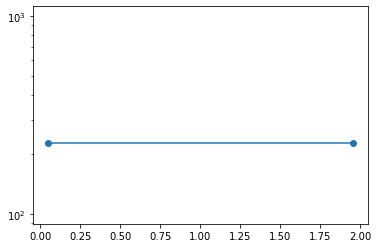

In [37]:
# plot caled reversal time distribution <T>p(T) vs scaled time T/<T>
L = 1000 # increase L for more consistent plots
N = L # density is constant with this
its = 1000
eta = 0.013 # fixed 0.02
problist = []
reversallist = []
counterlist = []
# combilist = [[1000,0.02],[2000,0.01]]
# for combi in combilist:
#     L = combi[0]
#     eta = combi[1]
p = (N/L)
x,W_list = generate2(L, its, eta, p)
avg_velocity = []
prev_mean_particle_velocity = 0
templist = []
counter = 0
prev_counter = 0
i = 0
tempW = []
for gen in x:
    if i != 999:
        tempW.append(W_list[i])
    # x-as is reversal / average flipping iterations
    # y-as reversal / total iterations
    velocities = []
    #print(gen)
    for vel in gen:  # only count the non-zero velocities
        if vel == []:
            continue
        if vel != 0:
            for v in vel:
                velocities.append(int(v))
    mean_particle_velocity = np.mean(velocities)
    if mean_particle_velocity * prev_mean_particle_velocity < 0:
        print('flip from',prev_mean_particle_velocity,'to', mean_particle_velocity,'after',counter-prev_counter, 'iterations')
        templist.append(counter-prev_counter)
        problist.append(np.mean(tempW))
        tempW = []
        prev_counter = counter
    prev_mean_particle_velocity = mean_particle_velocity
    counter += 1
    i += 1
reversallist.append(templist)
counterlist.append(counter)
print(problist)
print(reversallist)
print(counterlist)
Y = []
X = []
# scales reversal time distribution -> list alls reversal times and normalize
# scaled time 
for l in range(0,len(reversallist)):
    tempvaluesY = []
    tempvaluesX = []
    for value in reversallist[l]:
        tempvaluesY.append(np.mean(reversallist[l])*0.5) # should total iterations not be its?
        tempvaluesX.append(value/np.mean(reversallist[l]))
    Y.append(tempvaluesY)
    X.append(tempvaluesX)
print(X,Y)
plt.plot(X[0],Y[0])
plt.scatter(X[0],Y[0])
plt.yscale('log')
    

In [ ]:
plt.plot(eta_range, end_average_velocity)
plt.xlabel('eta(n)')
#plt.xticks((0.0002, 0.02, 0.02))
plt.ylabel('Va')
plt.show()
